In [1]:
#installing flygym to use juypternotebook
import os
os.chdir('..')
import sys
path = '/Users/laeti/Documents/EPFL/BA6Projet/flygym_adhesion-Laetitia'# replace 'my_folder' with the name of your folder
os.chdir(path)
sys.path.append(path)

In [2]:
os.chdir(path)

In [3]:
os.getcwd()

'c:\\Users\\laeti\\Documents\\EPFL\\BA6Projet\\flygym_adhesion-Laetitia'

In [4]:
pip install -e ."[mujoco]

Obtaining file:///C:/Users/laeti/Documents/EPFL/BA6Projet/flygym_adhesion-Laetitia
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: flygym
    Found existing installation: flygym 0.0.1
    Uninstalling flygym-0.0.1:
      Successfully uninstalled flygym-0.0.1
  Running setup.py develop for flygym
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pkg_resources
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo
from tqdm import trange
from flygym.util.config import all_leg_dofs

In [4]:
# Initialize simulation
run_time = 1
nmf = NeuroMechFlyMuJoCo(render_mode='saved',
                         timestep=1e-4,
                         render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left_top'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs,
                         actuated_bodies='all')

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="5000"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="5000"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="5000"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="5000"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="5000"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="5000"/>] actuators _adhesion
[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="5000"/>, MJCF Element: <adhesion na

In [10]:
# Load recorded data
data_path = Path(pkg_resources.resource_filename('flygym', 'data'))
#with open(data_path / 'behavior' / '210902_pr_fly1.pkl', 'rb') as f:
#    data = pickle.load(f)
with open(data_path / 'behavior' / 'tripod_engineered.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
print('Dict keys:', data.keys())
print('Length of time series:', len(data['joint_RFCoxa']))
print('Metadata:', data['meta'])

Dict keys: dict_keys(['meta', 'joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFCoxa_yaw', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1', 'joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMCoxa_yaw', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1', 'joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHCoxa_yaw', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1', 'joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFCoxa_yaw', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1', 'joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMCoxa_yaw', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1', 'joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHCoxa_yaw', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1'])
Length of time series: 12780
Metadata: {'timestep': 0.0001, 'source': 'Analyze_step_data.ipynb'}


In [12]:
# Interpolate 5x recording 
num_steps = int(run_time / nmf.timestep)
data_block = np.zeros((len(nmf.actuated_joints), num_steps))
measure_t = np.arange(len(data['joint_LFCoxa'])) * data['meta']['timestep']
interp_t = np.arange(num_steps) * nmf.timestep
for i, joint in enumerate(nmf.actuated_joints):
    data_block[i, :] = np.interp(interp_t, measure_t, data[joint])

Text(0, 0.5, 'Angle (radian)')

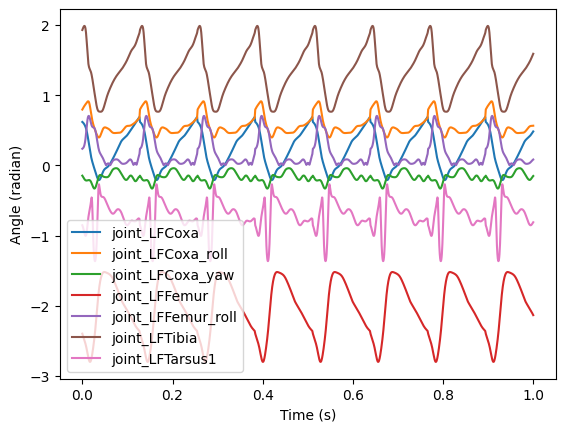

In [13]:
num_joints_to_visualize = 7
plt.plot(np.arange(data_block.shape[1]) * nmf.timestep,
         data_block[:num_joints_to_visualize].T,
         label=nmf.actuated_joints[:num_joints_to_visualize])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')

In [14]:
# Run simulation
obs, info = nmf.reset()

obs_list = [obs]
for i in trange(num_steps):
    joint_pos = data_block[:, i]
    action = {'joints': joint_pos, 'adhesion': obs['bodies_adhesion']}
    obs, info = nmf.step(action)
    nmf.render()
    obs_list.append(obs)

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="50000"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="50000"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="50000"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="50000"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="50000"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="50000"/>]


100%|██████████| 10000/10000 [06:01<00:00, 27.67it/s]


In [15]:
video_path = Path('kin_replay/video_adh2_tripod2.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x0f\x97(mdat\x00\x…

# STATIC:

for i in trange(num_steps):
    joint_pos = data_block[:, i] 

will be:

for i in trange(num_steps):
    joint_pos = data_block[:, 0] 

when we run the simulation

In [6]:
import numpy as np
import pkg_resources
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo
from tqdm import trange
from flygym.util.config import all_leg_dofs

In [12]:
# Initialize simulation
run_time = 1
nmf = NeuroMechFlyMuJoCo(render_mode='saved',
                         timestep=1e-4,
                         render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left_top'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs,
                         adhesion = True,
                         actuated_bodies='single_leg')

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="5000"/>] actuators _adhesion
[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="5000"/>]


In [13]:
# Load recorded data
data_path = Path(pkg_resources.resource_filename('flygym', 'data'))
with open(data_path / 'behavior' / '210902_pr_fly1.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
print('Dict keys:', data.keys())
print('Length of time series:', len(data['joint_RFCoxa']))
print('Metadata:', data['meta'])

Dict keys: dict_keys(['meta', 'joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFCoxa_yaw', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1', 'joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMCoxa_yaw', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1', 'joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHCoxa_yaw', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1', 'joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFCoxa_yaw', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1', 'joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMCoxa_yaw', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1', 'joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHCoxa_yaw', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1'])
Length of time series: 12780
Metadata: {'timestep': 0.0001, 'source': 'Analyze_step_data.ipynb'}


In [15]:
# Interpolate 5x recording 
num_steps = int(run_time / nmf.timestep)
num_steps = int(run_time/(nmf.timestep*4)) #to remove
data_block = np.zeros((len(nmf.actuated_joints), num_steps))
measure_t = np.arange(len(data['joint_LFCoxa'])) * data['meta']['timestep']
interp_t = np.arange(num_steps) * nmf.timestep
for i, joint in enumerate(nmf.actuated_joints):
    data_block[i, :] = np.interp(interp_t, measure_t, data[joint])

Text(0, 0.5, 'Angle (radian)')

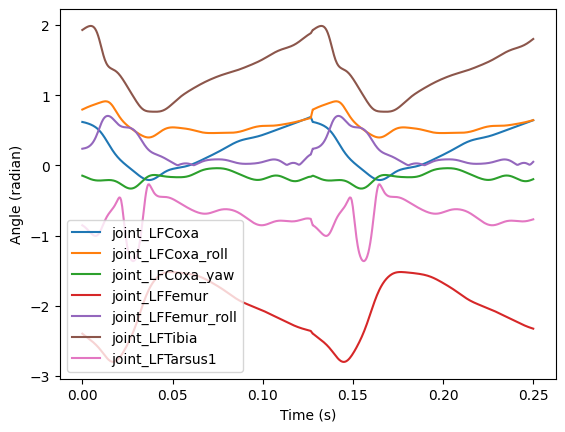

In [16]:
num_joints_to_visualize = 7
plt.plot(np.arange(data_block.shape[1]) * nmf.timestep,
         data_block[:num_joints_to_visualize].T,
         label=nmf.actuated_joints[:num_joints_to_visualize])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')

In [17]:
# Run simulation
obs, info = nmf.reset()

obs_list = [obs]
for i in trange(num_steps):
    
    if i == int(num_steps/2):
        print("hi")
        print(nmf.physics_config.values())

        #nmf.physics_config['gravity'] = (0,0,9.81e5)
        #nmf.physics_config.update(nmf.physics_config)
        print(nmf.physics_config.keys())
        print(nmf.physics_config.values())
        #print(nmf.physics_config.update(nmf.physics_config))
        nmf.physics.model.opt.gravity = (0,0,9.81e5)
    joint_pos = data_block[:, 0]
    action = {'joints': joint_pos, 'adhesion': obs['bodies_adhesion']}
    obs, info = nmf.step(action)
    nmf.render()
    obs_list.append(obs)

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="5000"/>]


100%|██████████| 2500/2500 [00:32<00:00, 76.92it/s]


In [18]:
video_path = Path('kin_replay/video_static_adh_singleleg_gravity_inv_tripod1.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x03\xfa/mdat\x00\x…

# Junk

In [20]:
dir(nmf.physics.model.)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_bindings',
 '_contexts',
 '_contexts_lock',
 '_data',
 '_dirty',
 '_free_rendering_contexts',
 '_make_rendering_contexts',
 '_named',
 '_new_warnings',
 '_physics_state_items',
 '_reload_from_data',
 '_reload_from_model',
 '_warnings',
 '_warnings_before',
 '_warnings_cause_exception',
 'activation',
 'after_reset',
 'bind',
 'check_divergence',
 'check_invalid_state',
 'contexts',
 'control',
 'copy',
 'data',
 'enable_profiling',
 'forward',
 'free',
 'from_binary_path',
 'from_byte_string',
 'from_mjcf_model',
 'from_model',
 'from_xml_path',
 'f

In [17]:
nmf.physics.model.actuator('Animat/actuator_position_joint_Head').gainprm 

array([900000.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.])

In [3]:
obs = {
    'joints': np.ndarray,  # NumPy array of shape (3, num_dofs)
                           # the 3 rows are the angle, angular velocity,
                           # and force at each DoF. The order of the
                           # DoFs is the same as ``env.actuated_joints``
    'fly': np.ndarray,  # NumPy array of shape (4, 3)
                        # 0th row: x, y, z position of the fly in arena
                        # 1st row: x, y, z velocity of the fly in arena
                        # 2nd row: orientation of fly around x, y, z axes
                        # 3rd row: rate of change of fly orientation
    #my addition:
    'bodies': np.ndarray, 
}

In [ ]:
action = {
    'joints': np.ndarray,  # NumPy array of shape (num_dofs,)
                           # the order of the DoFs is the same as
                           # ``env.actuated_joints``
}



The meaning of action array depends on the controller type: if position control is used (which is the default case), the array will be interpreted as the target joint angles. If velocity or force control is used, the array will be interpreted as the target velocity or the applied force.